<br><br>
<font color='FireBrick' size='9'><b>IPUMS data</b></font>

In [161]:
import pandas as pd

main_data_df = pd.read_feather("/Users/dadmehr/R/main_data.feather")

print(f"Number of rows: {main_data_df.shape[0]}")
print(f"Number of columns: {main_data_df.shape[1]}")

Number of rows: 43424806
Number of columns: 54


In [218]:
# Filter the data for YEAR == 2021
filtered_data = main_data_df[main_data_df['YEAR'] == 2021]

# INCTOT == 9999999 means N/A
filtered_data = filtered_data[filtered_data['INCTOT'] != 9999999]

# Print the column names
cols = filtered_data.columns
for i in range(0, len(cols), 5):
    print(", ".join(cols[i:i+5]))

YEAR, SAMPLE, SERIAL, CBSERIAL, NUMPREC
HHWT, CLUSTER, STATEICP, CITY, STRATA
GQ, HHINCOME, COUPLETYPE, PERNUM, PERWT
SFTYPE, SFRELATE, CBSUBFAM, CBSFTYPE, CBSFRELATE
MOMLOC, MOMRULE, POPLOC, POPRULE, SPLOC
SPRULE, RELATE, RELATED, SEX, AGE
MARST, MARRNO, MARRINYR, YRMARR, FERTYR
RACE, RACED, EDUC, EDUCD, DEGFIELD
DEGFIELDD, DEGFIELD2, DEGFIELD2D, EMPSTAT, EMPSTATD
LABFORCE, INCTOT, TRANWORK, TRANTIME, DEPARTS
ARRIVES, mom, dad, parent


<font color='FireBrick' size='6'><b>Income Distributions by Racial Group Analysis</b></font>

# ANOVA

## What is ANOVA?
ANOVA is a statistical method used to analyze the differences among group means in a sample. It tests the hypothesis that the means of several groups are equal, thus generalizing the t-test to more than two groups. ANOVA provides a statistical test of whether two or more population means are equal and therefore generalizes the t-test beyond two means.

### Why use ANOVA?
When you have multiple groups, you could conduct multiple t-tests to compare each pair of groups. However, this increases the chance of a Type I error (false positive). ANOVA allows for a single test to determine whether significant differences exist, reducing the risk of a Type I error.

### Key Concepts:
- Between-group Variability: Variability among the group means.
- Within-group Variability: Variability within each group due to individual differences.
- F-statistic: The ratio of between-group variability to within-group variability. A large F-statistic indicates that the group means are different.
### Assumptions of ANOVA:
- Independence: Observations are independent of each other.
- Normality: The data for each group follow a normal distribution.
- Homogeneity of Variance: The variance among the groups should be roughly equal.


In [165]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model using your filtered_data dataframe
model = ols('INCTOT ~ C(RACE)', data=filtered_data).fit()

# Perform ANOVA and get the table
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq         df           F  PR(>F)
C(RACE)   1.924993e+14        8.0  5026.51936     0.0
Residual  1.312483e+16  2741712.0         NaN     NaN


### Interpretation:

The F-statistic is very high (5026.51936), indicating that there's a significant difference in income `INCTOT` among the racial groups `RACE`.

# Visualization of Income Distributions by Racial Group

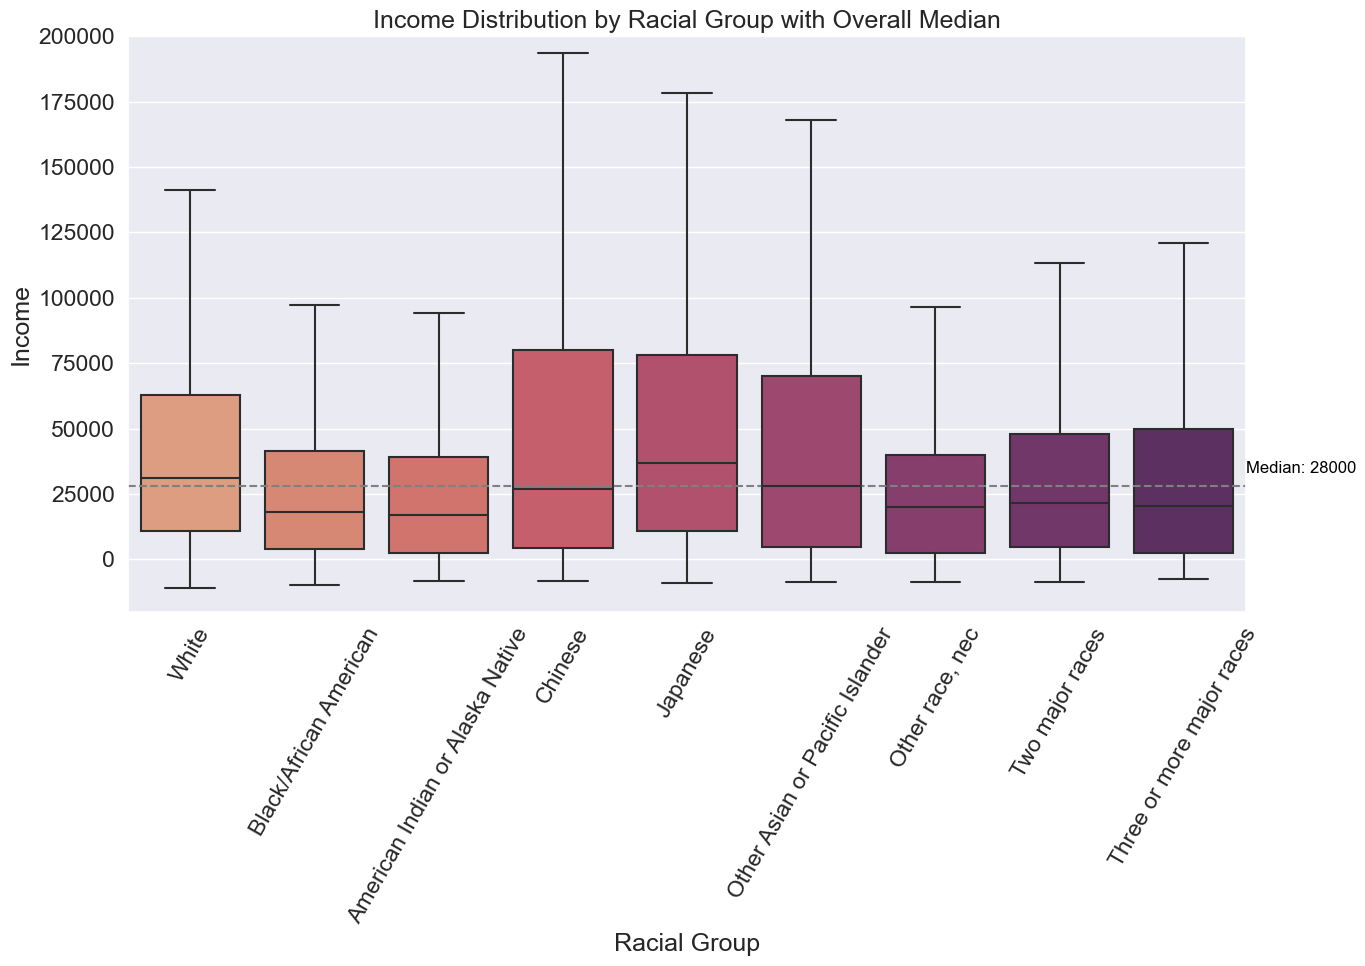

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Race mapping
race_mapping = {
    1: "White",
    2: "Black/African American",
    3: "American Indian or Alaska Native",
    4: "Chinese",
    5: "Japanese",
    6: "Other Asian or Pacific Islander",
    7: "Other race, nec",
    8: "Two major races",
    9: "Three or more major races"
}

# Set the style for seaborn
sns.set_style("whitegrid")

# Increase default font size
sns.set(font_scale=1.5)

# Calculate the overall median for INCTOT
median_inctot = filtered_data['INCTOT'].median()

# Create the boxplot
plt.figure(figsize=(14, 10))
ax = sns.boxplot(x='RACE', y='INCTOT', data=filtered_data, palette="flare", showfliers=False)

# Add a horizontal line for the overall median
plt.axhline(y=median_inctot, color='gray', linestyle='--')
plt.text(8.5, median_inctot + 5000, f'Median: {median_inctot:.0f}', color='black', fontsize=12)

# Add labels for median and outliers within each box
for i, box in enumerate(ax.artists):
    # Get the position of the median line in the box
    median_y = ax.lines[i*6+5].get_ydata()[0]
    ax.text(i, median_y, f'{median_y:.0f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=12)
    
    # Get y-data of the outliers (if any)
    outliers = [y for y in ax.lines[i*6+1].get_ydata() if y != -1]
    for outlier in outliers:
        ax.text(i, outlier, f'{outlier:.0f}', horizontalalignment='center', verticalalignment='bottom', color='red', fontsize=10)

# Set the title and labels for the plot
plt.title('Income Distribution by Racial Group with Overall Median')
plt.xlabel('Racial Group')
plt.ylabel('Income')
plt.xticks(ticks=range(len(race_mapping)), labels=[race_mapping[i] for i in range(1, 10)], rotation=60)  # Set x-ticks labels to race names

# Set the y-axis limit
plt.ylim(-20000, 200000)

# Display the plot
plt.tight_layout()
plt.show()


## Boxplot Explanation

A boxplot, also known as a whisker plot, visually represents the distribution of data based on its quartiles. Here's a breakdown of the components of a boxplot:

### Box:

- **Bottom of the Box**: 
  - Represents the first quartile (Q1), the 25th percentile of the data.
  - 25% of the data lies below this value.

- **Top of the Box**:
  - Represents the third quartile (Q3), the 75th percentile of the data.
  - 75% of the data lies below this value.

- **Band inside the Box**:
  - Represents the median (Q2), the 50th percentile of the data.
  - Half of the data lies below this value, and half lies above.

### Whiskers:

- **Lower Whisker**: 
  - Extends from Q1 to the smallest data point that is greater than or equal to `Q1 - 1.5 * IQR`, where `IQR` is the interquartile range, defined as `Q3 - Q1`.
  - Encompasses the range of "typical" data on the lower side (not considering outliers).

- **Upper Whisker**:
  - Extends from Q3 to the largest data point that is less than or equal to `Q3 + 1.5 * IQR`.
  - Encompasses the range of "typical" data on the upper side (not considering outliers).


The space between the top and bottom of the box represents the interquartile range (IQR), which is a measure of the middle 50% of the data's spread. The whiskers try to capture data outside of this middle 50%, but within a typical range. Any data points outside the whiskers are considered outliers. 

The boxplot provides a visual summary of the data's center and spread, as well as potential outliers.



<font color='FireBrick' size='6'><b>Income Distributions by SEX Group Analysis</b></font>

### Why Use the T-test?

The t-test is a statistical test employed to discern if there's a significant discrepancy between the means of two groups. In the context of the provided dataset, the t-test is utilized to compare the income distributions for two 'SEX' categories: Males and Females.

Reasons for using the t-test include:

1. **Comparing Two Groups**: Specifically tailored for comparing the means of two groups, the t-test is apt for this dataset's examination of the 'SEX' variable's income distributions.
  
2. **Assumptions**: While the t-test presupposes that data from both groups are normally distributed and possess equal variances, it remains robust against violations of these assumptions, particularly for large samples.

3. **Independent Samples**: The male and female income groups are independent, meaning an individual's income in one group doesn't directly influence an individual's income in the other group. The independent two-sample t-test is meticulously designed for such a comparison.

4. **Purpose of Analysis**: The primary objective is ascertaining if a statistically significant income disparity exists between males and females. Through comparison of sample means and taking into account the two groups' variances, the t-test offers insights into this.

5. **Output**: Two primary outcomes emerge from the t-test:
   - **T-statistic**: Illustrating the difference in terms of standard errors between the two sample means. A substantial absolute t-statistic value suggests a notable difference between the groups, considering the inherent variability.
   - **P-value**: Crucial for hypothesis testing, a small p-value (often ≤ 0.05) suggests that the null hypothesis (no income difference between genders) can be rejected.

In essence, the t-test is wielded here to ascertain if a significant difference in average incomes between males and females is evident in the dataset.


In [169]:
from scipy.stats import ttest_ind

# Separating the incomes based on sex
male_income = filtered_data[filtered_data['SEX'] == 1]['INCTOT']
female_income = filtered_data[filtered_data['SEX'] == 2]['INCTOT']

# T-test
t_stat, p_value = ttest_ind(male_income, female_income)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 252.3461917740732
P-value: 0.0


In [184]:
from scipy.stats import shapiro, levene

# Checking normality for male and female incomes
male_w, male_p = shapiro(male_income)
female_w, female_p = shapiro(female_income)

print("Shapiro-Wilk Test for Males:", male_p)
print("Shapiro-Wilk Test for Females:", female_p)

# A small p-value (< 0.05) suggests that the data might not be normally distributed.

# Checking equality of variance
stat, p = levene(male_income, female_income)
print("\nLevene's Test:", p)

# A small p-value (< 0.05) suggests that the variances might not be equal.


Shapiro-Wilk Test for Males: 0.0
Shapiro-Wilk Test for Females: 0.0

Levene's Test: 0.0


/Users/dadmehr/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Assumptions and Test Choice

Given the results from the assumption tests:

## Shapiro-Wilk Test Results
- **Males**: A p-value of `0.0` suggests a significant deviation from a normal distribution.
- **Females**: Similarly, a p-value of `0.0` indicates a departure from normality.

This means that the assumption of normality seems to be violated for both male and female income datasets.

## Levene's Test Result
- The p-value of `0.0` indicates that the variances of male and female incomes might not be equal, violating the assumption of homogeneity of variances.

## Additional Considerations
- The warning for the Shapiro-Wilk test is noteworthy. It's triggered due to the large size of the datasets. When datasets are large, this test becomes sensitive, often indicating violations of normality for even minor deviations.


## Conclusion:

Given that both critical assumptions appear to be violated, it's prudent to be cautious while interpreting the results from the t-test. As an alternative, a non-parametric test, like the Mann-Whitney U test, might be a more appropriate choice to confirm our findings.


# Mann-Whitney U Test Results

In [195]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U test
u_stat, p_value = mannwhitneyu(male_income, female_income, alternative='two-sided')

print("U-statistic:", u_stat)
print("P-value:", p_value)


U-statistic: 1120138247954.0
P-value: 0.0



## Interpretation:

- The U-statistic value is notably high, as can be expected due to the substantial sample sizes.
- The p-value of `0.0` suggests a statistically significant difference between the male and female income distributions.

Given this result, the null hypothesis (suggesting no difference between the two groups) is rejected. This means there's a significant difference in incomes between males and females in the dataset.

---

<font color='FireBrick' size='5'><b>Visualization of Income Distributions by Sex</b></font>

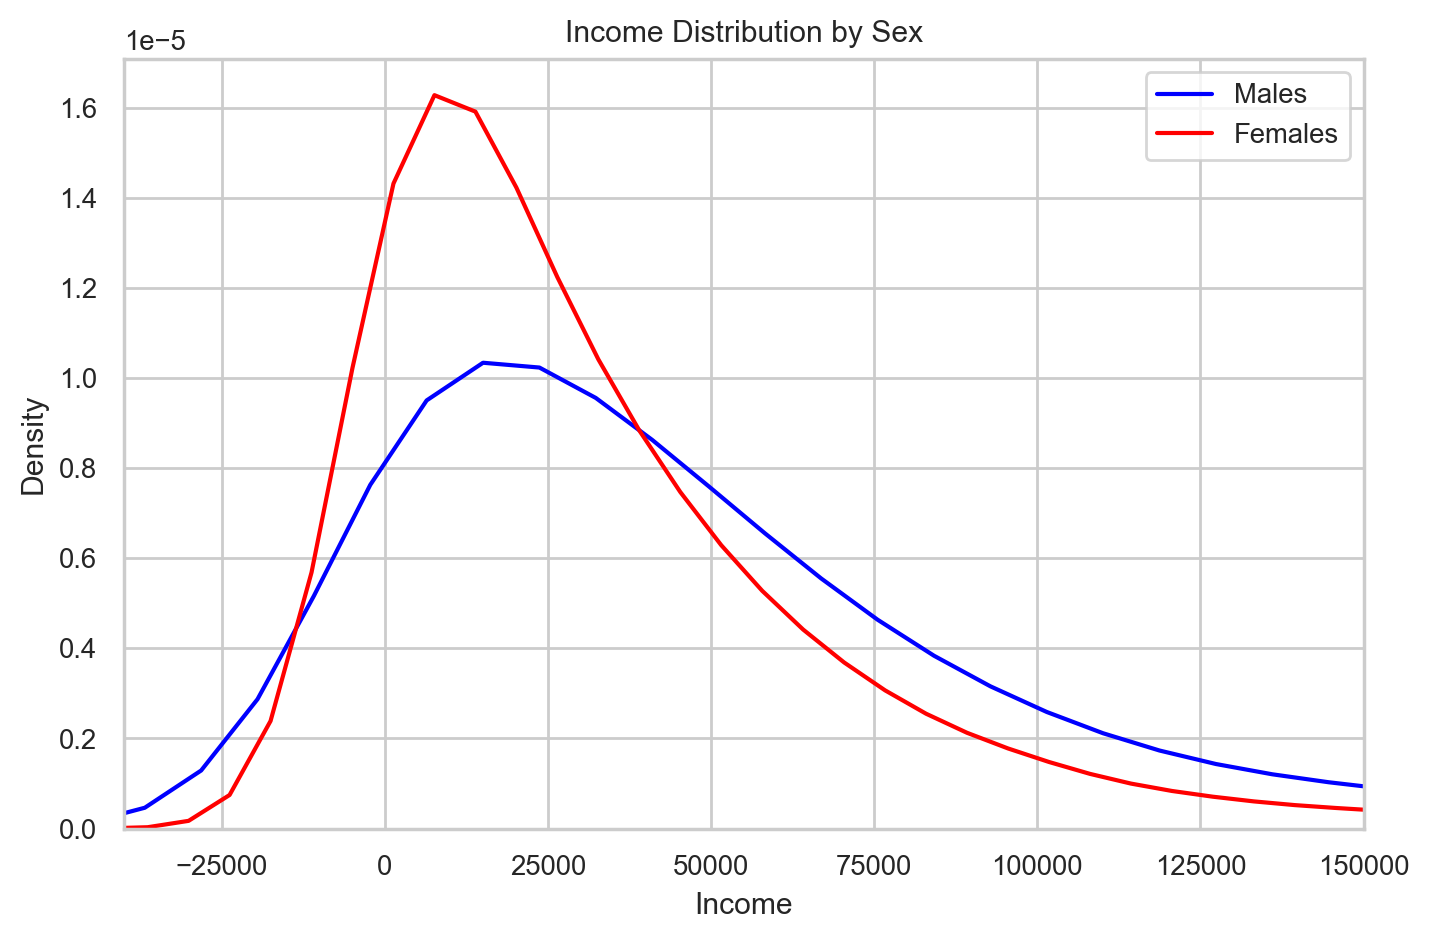

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separating the incomes based on sex
male_income = filtered_data[filtered_data['SEX'] == 1]['INCTOT']
female_income = filtered_data[filtered_data['SEX'] == 2]['INCTOT']

# Set the style and font scale for seaborn
sns.set_style("whitegrid")

# Setting up the figure and axis with increased dpi for better resolution
plt.figure(figsize=(8, 5),dpi = 200)

# Plotting the smoothed KDE for males and females
sns.kdeplot(male_income, color='blue', label='Males', bw_adjust=3.5)
sns.kdeplot(female_income, color='red', label='Females', bw_adjust=3.5)

# Setting the x-axis limits and other plot attributes
plt.xlim(-40000, 150000)
plt.xlabel("Income")
plt.ylabel("Density")
plt.title("Income Distribution by Sex")
plt.legend()

plt.show()

<font color='FireBrick' size='6'><b>Education by Sex Analysis</b></font>

# Why are we running the Chi-Squared Test?

The Chi-Squared Test is a statistical test used to determine if there's a significant association between two categorical variables. In this context:

- **Purpose**: We aim to determine if there's a significant relationship between `SEX` (gender) and `EDUC` (education level) in the 2021 dataset.
- **Rationale**: If gender has an influence on the level of education, it can provide insights into the demographic distribution of educational attainment in the dataset, which could be valuable for research or policy-making decisions.

---

In [212]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for SEX and EDUC
contingency = pd.crosstab(filtered_data['SEX'], filtered_data['EDUC'])

# Perform the Chi-Squared Test
chi2, p, _, expected = chi2_contingency(contingency)

# Print the results
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"\nExpected Table:")
print(expected)


Chi2 Statistic: 7268.831630692563
P-value: 0.0

Expected Table:
[[ 23274.43128021   5332.22113738  30444.49227766  28023.28081523
   33883.80171615  38530.30535602 469841.2503165  176692.87755756
  107340.37483464 255985.6035067  166860.36120196]
 [ 24481.56871979   5608.77886262  32023.50772234  29476.71918477
   35641.19828385  40528.69464398 494209.7496835  185857.12244244
  112907.62516536 269262.3964933  175514.63879804]]


# Interpretation of Chi-Squared Test Results

## Chi2 Statistic: 7268.83

- This value represents the test statistic. A larger value of Chi2 indicates a stronger association between the two variables.

## P-value: 0.0

- The p-value helps us determine the statistical significance of our observed results. 
- A p-value less than 0.05 is typically taken to mean the results are statistically significant. 
- A p-value of 0.0 indicates that the observed distribution is very unlikely under the null hypothesis, suggesting a significant relationship.

## Expected Table:

- This table provides the expected frequencies of each category combination if the two variables were independent (no association). It is calculated based on the marginal sums of the original contingency table.

### Overall:

1. **Significance**: The p-value is 0.0, which is less than the typical alpha level of 0.05. This means we reject the null hypothesis, concluding a statistically significant relationship between gender and education level.
2. **Effect Size**: The Chi2 statistic is large (7268.83), indicating a strong association between the variables.
3. **Expected vs Observed**: Comparing the actual contingency table with the expected table can reveal the strongest discrepancies. This would show which gender-education combinations are more or less frequent than expected by chance.

---

<font color='FireBrick' size='5'><b>Visualization of Education by Sex</b></font>

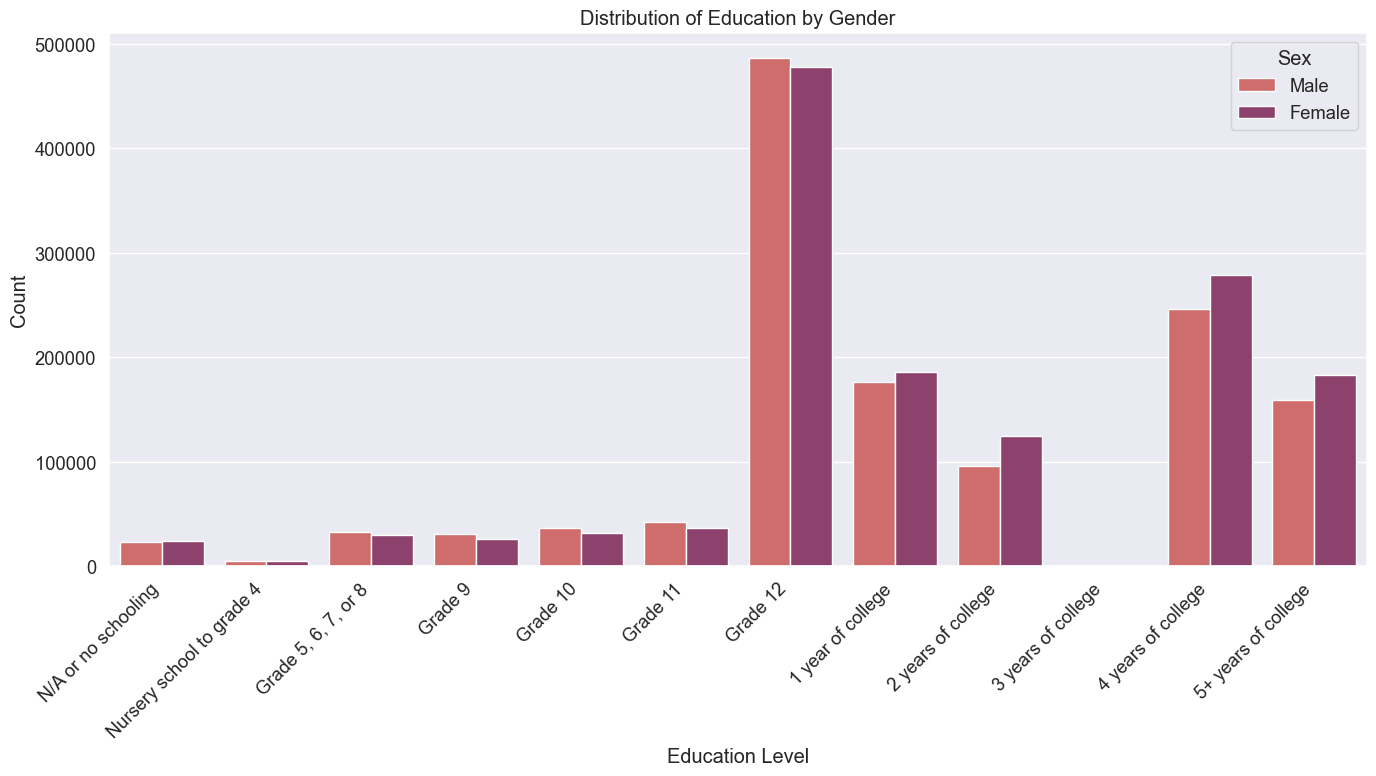

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

# Mapping education codes to their descriptions
educ_labels = {
    0: 'N/A or no schooling',
    1: 'Nursery school to grade 4',
    2: 'Grade 5, 6, 7, or 8',
    3: 'Grade 9',
    4: 'Grade 10',
    5: 'Grade 11',
    6: 'Grade 12',
    7: '1 year of college',
    8: '2 years of college',
    9: '3 years of college',
    10: '4 years of college',
    11: '5+ years of college'
}

# Create a bar plot
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='EDUC', hue='SEX', data=filtered_data, palette='flare', order=educ_labels.keys())

# Set custom x-axis labels from the mapping
ax.set_xticklabels(educ_labels.values(), rotation=45, ha="right")

# Add labels and title
plt.title('Distribution of Education by Gender')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])  # Adjust labels if they are different in your dataset

# Display the plot
plt.tight_layout()
plt.show()


<font color='FireBrick' size='6'><b>Ordinary Least Squares Regression with Categorical Variables</b></font>

In [265]:
import statsmodels.api as sm
import pandas as pd

sex_labels = {
    1: 'Male',
    2: 'Female'
}

# Mapping the values to the given labels
filtered_data['EDUC_LABEL'] = filtered_data['EDUC'].map(educ_labels)
filtered_data['RACE_LABEL'] = filtered_data['RACE'].map(race_mapping)

filtered_data['SEX_LABEL'] = filtered_data['SEX'].map(sex_labels)

# Create dummy variables using the label columns
dummies_sex = pd.get_dummies(filtered_data['SEX_LABEL'], prefix='SEX', drop_first=True)
dummies_educ = pd.get_dummies(filtered_data['EDUC_LABEL'], prefix='EDUC', drop_first=True)
dummies_race = pd.get_dummies(filtered_data['RACE_LABEL'], prefix='RACE', drop_first=True)

# Concatenate the dummy variables to form the independent variable matrix X
X = pd.concat([dummies_sex, dummies_educ, dummies_race], axis=1)

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Defining the dependent variable
y = filtered_data['INCTOT']

# Running the regression model
model = sm.OLS(y, X).fit()

# Displaying the summary statistics of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 INCTOT   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                 3.092e+04
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:11:06   Log-Likelihood:            -3.4199e+07
No. Observations:             2741721   AIC:                         6.840e+07
Df Residuals:                 2741701   BIC:                         6.840e+07
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


<font color='FireBrick' size='6'><b>Visualization of Linear and Polynomial Fits for Income vs. Age</b></font>

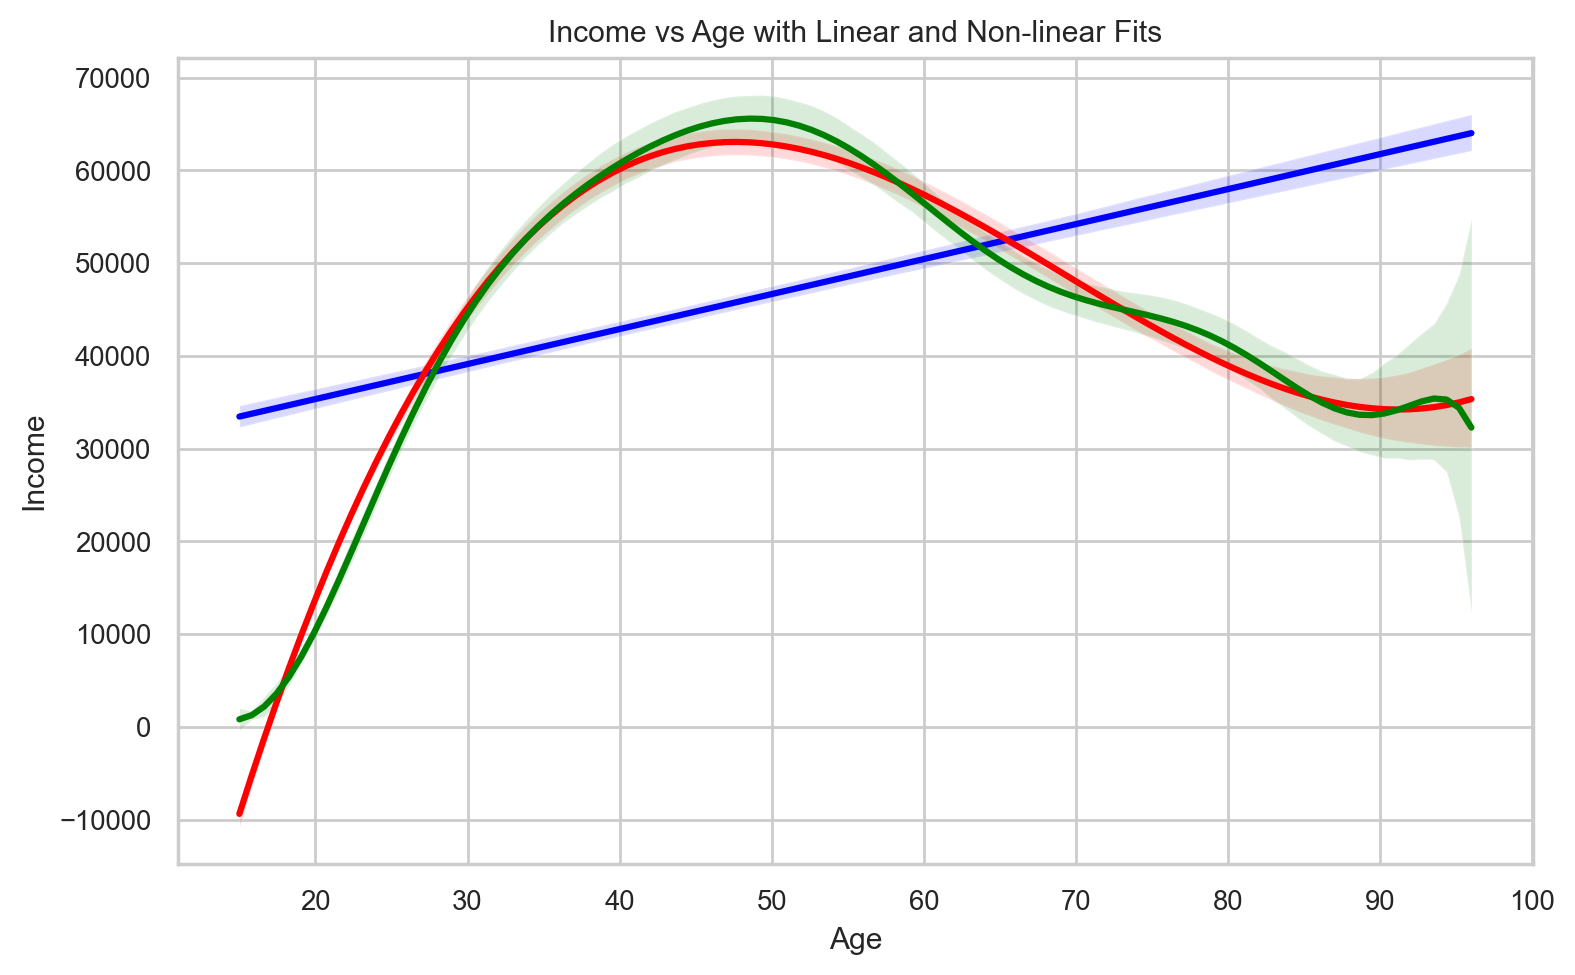

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the size of the figure for plotting
plt.figure(figsize=(8, 5),dpi = 200)

# Taking a random sample of the data to speed up the process
sample_data = filtered_data.sample(frac=0.01)  # Taking 10% of the data

# Linear regression fit
sns.regplot(x='AGE', y='INCTOT', data=sample_data, order=1, scatter=False, line_kws={'color':'blue', 'label':'Linear Fit'})

# Non-linear (3rd degree polynomial) fit
sns.regplot(x='AGE', y='INCTOT', data=sample_data, order=3, scatter=False, line_kws={'color':'red', 'label':'3rd Degree Polynomial Fit'})

# Non-linear (10th degree polynomial) fit
sns.regplot(x='AGE', y='INCTOT', data=sample_data, order=10, scatter=False, line_kws={'color':'green', 'label':'10th Degree Polynomial Fit'})

plt.title("Income vs Age with Linear and Non-linear Fits")
plt.xlabel("Age")
plt.ylabel("Income")
plt.tight_layout()
plt.show()
